<a href="https://colab.research.google.com/github/pksj/IIITA_2nd_SEM/blob/main/Intro_to_ML_Project_LOWESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime
!pip install scikit-lego
from sklego.linear_model import LowessRegression


# Covid - 19 Data

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1    1
    0    0    0    1    0    1    1    0    2    3    0    2    8    0
    4    3    5    3   23   14   14   13   19   18   24   18   49   22
   39   43   27   35   29   26   38   35   38   33   53   36   40   59
   45   56   58   69   71   75   69  100   68  175  127   92  104   96
  116  111   82  121  136   98  104  118  154  131  146  132  150  142
  142  156  148  172  190  177  269  205  223  200  221  259  275  286
  297  261  266  246  388  394  389  309  321  395 2006  341  342  366
  307  426  312  468  424  401  381  414  384  417  506  438  377  444
  610  421  474  479  491  479  521  543  500  540  588  614  680  676
  543  675  596  671 1120  755  761  690  716  636  776  779  783  765
  852  758  810  849  919  899  940  875 1013  887  835  950 1006  990
  950  961  880 1089  980  981  953  918  846  854 1066 1017 1065 1019
  944 

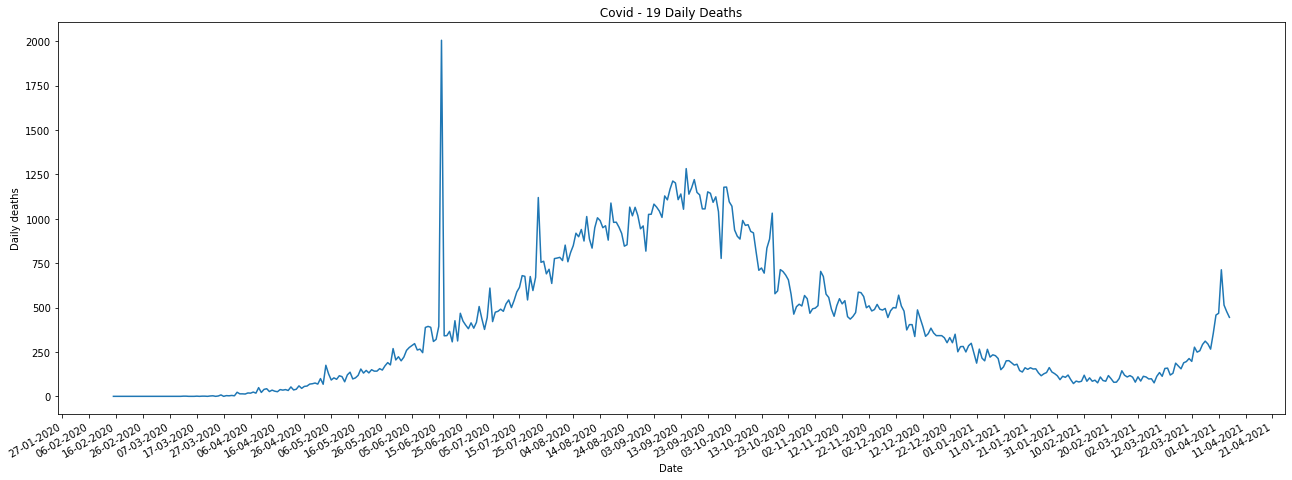

In [2]:
# Data for 15 Feb 2020 - 5 April 2021

df = pd.read_csv("/content/dataset.csv", usecols = ['Deaths'])
# print(df)
daily_deaths = np.array(df).reshape((len(df)))
# print(daily_deaths)

# to get the dates from 1st march to 31st march
start_date = datetime.datetime( 2020, 2, 15) 
end_date = datetime.datetime( 2021, 4, 6)
time_delta = datetime.timedelta(days = 1)

dates = mdates.drange(start_date,end_date,time_delta) 
#print(dates)


# to plot dates on x axis and daily deaths on y axis

plt.figure(figsize=(22,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(dates,daily_deaths)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Daily deaths")
plt.title(" Covid - 19 Daily Deaths ")
plt.show()


# Normalization

In [3]:
# Normalized data

daily_deaths_min = min(daily_deaths)
daily_deaths_max = max(daily_deaths)
daily_deaths_mean = np.mean(daily_deaths)

#Mean normalizaiotn
daily_deaths_normalized = np.array([ ( death - daily_deaths_mean) / ( daily_deaths_max - daily_deaths_min ) for death in daily_deaths ])
# print(daily_deaths_normalized)

dates_min = min(dates)
dates_max = max(dates)
dates_mean = np.mean(dates)

dates_normalized = np.array([ ( date - dates_mean ) / ( dates_max - dates_min ) for date in dates ])
# print(dates_normalized)


# Model Creation

In [4]:
mod = LowessRegression(sigma=0.0001, span=0.5).fit(dates_normalized.reshape(-1, 1), daily_deaths_normalized)

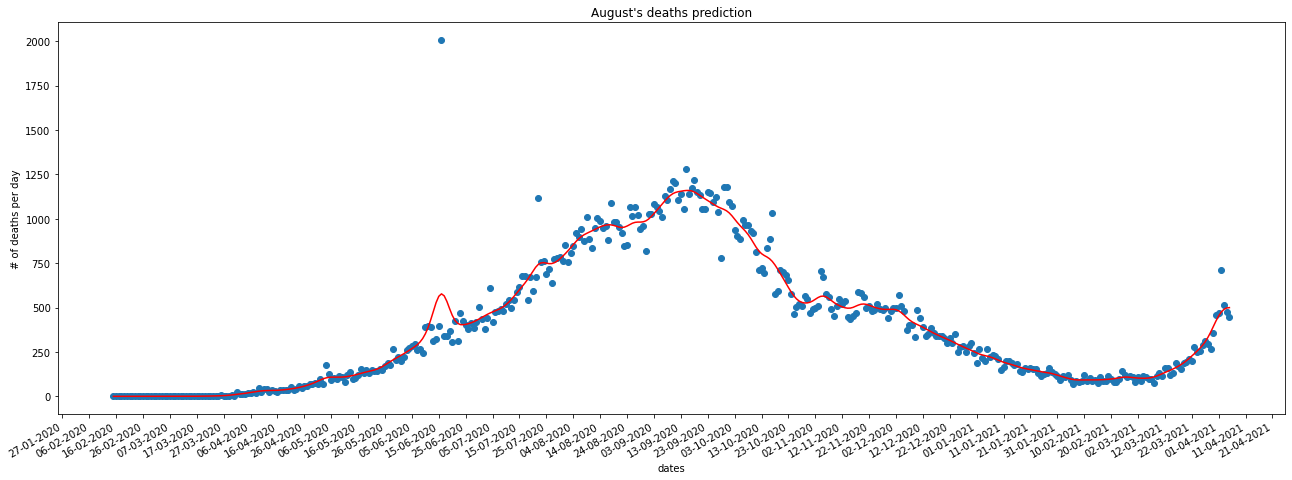

In [12]:
predicted = mod.predict(dates_normalized.reshape(-1, 1))
# print(predicted)
predicted = (predicted * (daily_deaths_max - daily_deaths_min)) + daily_deaths_mean
# print(predicted)


plt.figure(figsize=(22,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.scatter(dates,daily_deaths)
plt.gcf().autofmt_xdate()
plt.xlabel("dates")
plt.ylabel("# of deaths per day")
plt.title("August's deaths prediction")
plt.plot(dates, predicted, color = 'red')  
plt.show() 

#August Data creation

In [6]:

#August months data

august_deaths = np.array([852,758,810,849,919,899,940,875,1013,887,835,950,1006,990,950,961,880,1089,980,981,953,
                          918,846,854,1066,1017,1065,1019,944,960,818])

#print(august_deaths)

start_date = datetime.datetime( 2020, 8, 1) 
end_date = datetime.datetime( 2020, 9, 1)
time_delta = datetime.timedelta(days = 1)

august_dates = mdates.drange(start_date,end_date,time_delta) 

#print(august_dates)



# Normalizing data
august_deaths_min = min(august_deaths)
august_deaths_max = max(august_deaths)
august_deaths_mean = np.mean(august_deaths)

august_deaths_normalized = np.array([ ( death - august_deaths_mean ) / ( august_deaths_max - august_deaths_min ) for death in august_deaths ])
#print(august_deaths)

august_dates_min = min(august_dates)
august_dates_max = max(august_dates)
august_dates_mean = np.mean(august_dates)

august_dates_normalized = np.array([ ( date - august_dates_mean ) / ( august_dates_max - august_dates_min ) for date in august_dates ])
#print(august_dates)



# August prediction

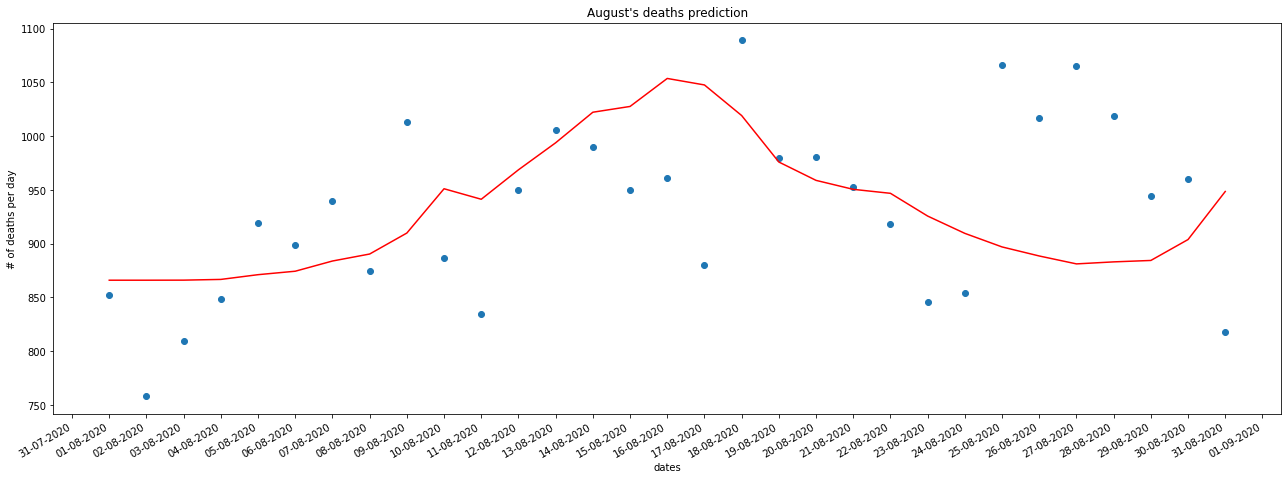

In [7]:
predicted = mod.predict(august_dates_normalized.reshape(-1, 1))
# print(predicted)
predicted = (predicted * (august_deaths_max - august_deaths_min)) + august_deaths_mean
# print(predicted)

# plt.figure(figsize=(12, 4))
# plt.scatter(dates_normalized, daily_deaths_normalized)
# plt.plot(august_dates_normalized, predicted, color='orange')


plt.figure(figsize=(22,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.scatter(august_dates,august_deaths)
plt.gcf().autofmt_xdate()
plt.xlabel("dates")
plt.ylabel("# of deaths per day")
plt.title("August's deaths prediction")
plt.plot(august_dates, predicted, color = 'red')  
plt.show() 

In [9]:
percentage_error = sum([(np.abs(x-y) / y)*100 for x , y in zip(predicted, august_deaths)]) / len(august_deaths)
print("\nAverage percenatge error for august month's prediction = ",percentage_error)


Average percenatge error for august month's prediction =  7.406964917296089


In [15]:
#April months data

April_deaths = np.array([852,758,810,849,919,899,940,875,1013,887,835,950,1006,990,950,961,880,1089,980,981,953,
                          918,846,854,1066,1017,1065,1019,944,960,818])

#print(April_deaths)

start_date = datetime.datetime( 2021, 4, 1) 
end_date = datetime.datetime( 2021, 5, 1)
time_delta = datetime.timedelta(days = 1)

April_dates = mdates.drange(start_date,end_date,time_delta) 

#print(April_dates)



# Normalizing data
April_deaths_min = min(April_deaths)
April_deaths_max = max(April_deaths)
April_deaths_mean = np.mean(April_deaths)

April_deaths_normalized = np.array([ ( death - April_deaths_mean ) / ( April_deaths_max - April_deaths_min ) for death in April_deaths ])
#print(April_deaths)

April_dates_min = min(April_dates)
April_dates_max = max(April_dates)
April_dates_mean = np.mean(April_dates)

April_dates_normalized = np.array([ ( date - April_dates_mean ) / ( April_dates_max - April_dates_min ) for date in April_dates ])
#print(April_dates)


In [17]:
april_predicted = mod.predict(April_dates.reshape(-1, 1))
# print(predicted)
# april_predicted = (predicted * (April_deaths_max - April_deaths_min)) + April_deaths_mean
# print(predicted)

# plt.figure(figsize=(12, 4))
# plt.scatter(dates_normalized, daily_deaths_normalized)
# plt.plot(April_dates_normalized, predicted, color='orange')


plt.figure(figsize=(22,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.scatter(dates,daily_deaths)
plt.gcf().autofmt_xdate()
plt.xlabel("dates")
plt.ylabel("# of deaths per day")
plt.title("April's deaths prediction")
plt.plot(April_dates, april_predicted, color = 'red')  
plt.show() 

ZeroDivisionError: ignored